# Symmetric Matrices

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

Today we'll study a very important class of matrices: __symmetric__ matrices.

We'll see that symmetric matrices have properties that relate to both eigendecomposition, and orthogonality.   

Furthermore, symmetric matrices open up a broad class of problems we haven't yet touched on: constrained optimization.

As a result, symmetric matrices arise very often in applications.

__Definition.__ A symmetric matrix is a matrix $\,A$ such that $\;A^T = A$.   

Clearly, such a matrix is square.

Furthermore, the entries that are not on the diagonal come in pairs, on opposite sides of the diagonal.

__Example.__ Here are three __symmetric__ matrices:

$$\mat{{rr}1&0\\0&-3},\;\;\;\;\mat{{rrr}0&-1&0\\-1&5&8\\0&8&-7},\;\;\;\;\mat{{ccc}a&b&c\\b&d&e\\c&e&f}$$

Here are three __nonsymmetric__ matrices:

$$\mat{{rr}1&-3\\3&0},\;\;\;\;\mat{{rrr}0&-4&0\\-6&1&-4\\0&-6&1},\;\;\;\;\mat{{cccc}5&4&3&2\\4&3&2&1\\3&2&1&0}$$

## Orthogonal Diagonalization

First, we'll look at a remarkable property of symmatric matrices: their eigenvectors are __orthogonal__.

__Example.__ Diagonalize the following symmetric matrix:

$$A = \mat{{rrr}6&-2&-1\\-2&6&-1\\-1&-1&5}$$

__Solution.__

The characteristic equation of $A$ is

$$0 = -\lambda^3 + 17\lambda^2 -90\lambda + 144 $$

$$ = -(\lambda-8)(\lambda-6)(\lambda-3)$$

So the eigenvalues are 8, 6, and 3.

We construct a basis for each eigenspace (using our standard method of finding the nullspace of $A-\lambda I$):

$$\lambda_1 = 8: \vv_1 = \mat{{r}-1\\1\\0};\;\;\;\;\lambda_2=6: \vv_2 = \mat{{r}-1\\-1\\2};\;\;\;\;\;\lambda_3=3: \vv_3=\mat{{r}1\\1\\1}$$

These three vectors form a basis for $\R^3.$

More interestingly, these three vectors are __mutually orthogonal.__

For example, 

$$\vv_1^T\vv_2 = (-1)(-1) + (1)(-1) + (0)(2) = 0$$

That is $\{\vv_1, \vv_2, \vv_3\}$ is an _orthogonal_ basis for $\R^3.$

Let's normalize these vectors so they each have length 1:

$$\vu_1 = \mat{{r}-1\sqrt{2}\\1/\sqrt{2}\\0};\;\;\;\;\vu_2 = \mat{{r}-1/\sqrt{6}\\-1/\sqrt{6}\\2/\sqrt{6}};\;\;\;\;\; \vu_3=\mat{{r}1/\sqrt{3}\\1/\sqrt{3}\\1/\sqrt{3}}$$

Now let's write the diagonalization of $A$ in terms of these eigenvectors and eigenvalues:

$$P = \mat{{rrr}-1/\sqrt{2}&-1/\sqrt{6}&1/\sqrt{3}\\1/\sqrt{2}&-1/\sqrt{6}&1/\sqrt{3}\\0&2/\sqrt{6}&1/\sqrt{3}},\;\;\;\;D = \mat{{ccc}8&0&0\\0&6&0\\0&0&3}.$$

Then, $A = PDP^{-1},$ as usual.

But, here is the interesting thing:  $P$ is square and has orthonormal columns.   So $P$ is an __orthogonal__ matrix.

So, that measns that $P^{-1} = P^T.$

So, $A = PDP^T.$

Here is a theorem that shows that this __always__ happens when we diagonalize a symmetric matrix:

__Theorem.__   If $A$ is symmetric, then any two eigenvectors of $A$ from different eigenspaces are orthogonal.

__Proof.__

Let $\vv_1$ and $\vv_2$ be eigenvectors that correspond to distinct eigenvalues, say, $\lambda_1$ and $\lambda_2.$  

To show that $\vv_1^T\vv_2 = 0,$ compute

$$\lambda_1\vv_1^T\vv_2 = (\lambda_1\vv_1)^T\vv_2$$

$$=(A\vv_1)^T\vv_2$$

$$=(\vv_1^TA^T)\vv_2$$

$$=\vv_1^T(A\vv_2)$$

$$=\vv_1^T(\lambda_2\vv_2)$$

$$=\lambda_2\vv_1^T\vv_2$$

So we conclude that $\lambda_1(\vv_1^T\vv_2) = \lambda_2(\vv_1^T\vv_2).$

But $\lambda_1 \neq \lambda_2,$ so this can only happen if $\vv_1^T\vv_2 = 0.$

So $\vv_1$ is orthogonal to $\vv_2.$

We can now introduce a special kind of diagonalizability:

An $n\times n$ matrix is said to be __orthogonally diagonalizable__ if there are an orthogonal matrix $P$ (with $P^{-1} = P^T$) and a diagonal matrix $D$ such that 

$$A = PDP^T = PDP^{-1}$$

Such a diagonalization rquires $n$ linearly independent and orthonormal eigenvectors.

When is this possible?

If $A$ is orthogonally diagonalizable, then

$$A^T = (PDP^T)^T = (P^T)^TD^TP^T = PDP^T = A$$

So $A$ is symmetric!

That is, whenever $A$ is orthogonally diagonalizable, it is symmetric.

It turns out the converse is true (though we won't prove it).  This leads to the following theorem:

__Theorem.__  An $n\times n$ matrix is orthogonally diagonalizable if and only if $A$ is a symmetric matrix.

Remember that when we studied diagonalization, we found that it was a difficult process to determine if an arbitrary matrix was diagonalizable.

But here, we have a very nice rule: __every symmetric matrix is (orthogonally) diagonalizable.__

## Quadratic Forms

Up until now, we have mainly focused on linear equations -- equations in which the $x_i$ terms occur only to the first power.

Actually, though, we have looked at some quadratic expressions when we considered least-squares problems:  For exanmple, we looked at expressions such as $\Vert x\Vert^2$ which is $\sum x_i^2.$

We'll now look at quadratic expressions generally.   We'll see that there is a natural and useful connection to symmetric matrices.

__Definition.__ A __quadratic form__ is a function of variables, eg, $x_1, x_2, \dots, x_n,$ in which every term has degree two.

Example:  

$4x_1^2 + 2x_1x_2 + 3x_2^2$ is a quadratic form.

$4x_1^2 + 2x_1$ is not a quadratic form.

Quadratic forms arise in many settings, including optimization, signal processing, physics, economics, and statistics. 

__Fact.__  Every quadratic form can be expressed as $\vx^TA\vx$, where $A$ is a symmetric matrix.

To see this, let's look at some examples.

__Example.__  Let $\vx = \mat{{c}x_1\\x_2}.$  Compute $\vx^TA\vx$ for the matrix $A = \mat{{cc}4&0\\0&3}.$

__Solution.__  

$$\vx^TA\vx = \mat{{cc}x_1&x_2}\mat{{cc}4&0\\0&3}\mat{{c}x_1\\x_2}$$

$$= \mat{{cc}x_1&x_2}\mat{{c}4x_1\\3x_2}$$

$$= 4x_1^2 + 3x_2^2.$$

__Example.__   Compute $\vx^TA\vx$ for the matrix $A = \mat{{rr}3&-2\\-2&7}.$

__Solution.__

$$\vx^TA\vx = \mat{{cc}x_1&x_2}\mat{{rr}3&-2\\-2&7}\mat{{c}x_1\\x_2}$$

$$=x_1(3x_1 - 2x_2) + x_2(-2x_1 + 7x_2)$$

$$=3x_1^2-2x_1x_2-2x_2x_1+7x_2^2$$

$$=3x_1^2-4x_1x_2+7x_2^2$$

__Example.__  For $\vx$ in $\R^3$, let 

$$Q(\vx) = 5x_1^2 + 3x_2^2 + 2x_3^2 - x_1x_2 + 8x_2x_3.$$

Write this quadratic form  $Q(\vx)$ as $\vx^TA\vx$.

__Solution.__  

The coefficients of $x_1^2, x_2^2, x_3^2$ go on the diagonal of $A$.  

Based on the previous example, we can see that the coefficient of each cross term $x_ix_j$ is the sum of two values in symmetric positions on opposite sides of the diagonal of $A$.

So to make $A$ symmetric, the coefficient of $x_ix_j$ for $i\neq j$ must be split evenly between the $(i,j)$- and $(j,i)$-entries of $A$.

You can check that

$$Q(\vx) = \vx^TA\vx = \mat{{ccc}x_1&x_2&x_3}\mat{{ccc}5&-1/2&0\\-1/2&3&4\\0&4&2}\mat{{c}x_1\\x_2\\x_3}$$

## Classifying Quadratic Forms

Notice that $\vx^TA\vx$ is a __scalar__.

In other words, when $A$ is an $n\times n$ matrix, the quadratic form $Q(\vx) = \vx^TA\vx$ is a real-valued function with domain $\R^n$.   

Here are four quadratic forms with domain $\R^2$.   

Notice that except at $\vx=\mathbf{0},$ the values of $Q(\vx)$ are all positive in the leftmost case, and all negative in the rightmost case.

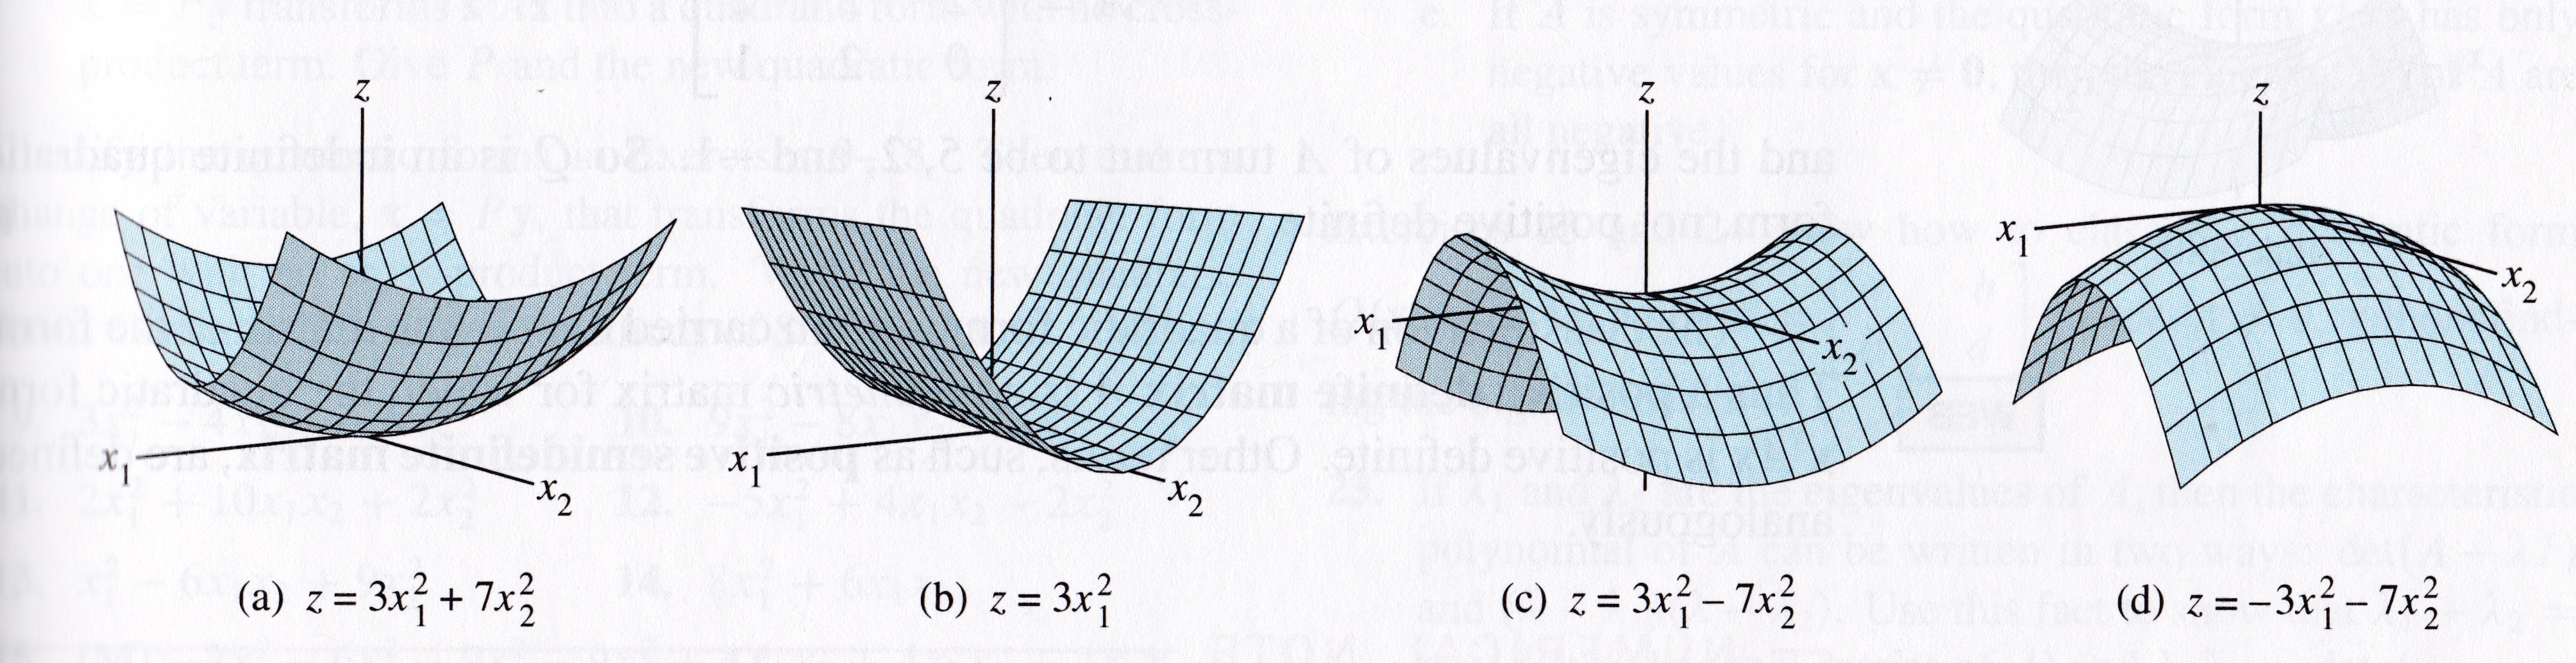

In [3]:
# image credit: Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-7-2-4.jpg", width=650))

The differences between these surfaces is important for problems such as __optimization__.

In an optimization problem, one seeks the minimum or maximum value of a function (perhaps over a subset of its domain).

__Definition.__  A quadratic form $Q$ is:

1. __positive definite__ if $Q(\vx) > 0$ for all $\vx \neq 0.$
2. __negative definite__ if $Q(\vx) < 0$ for all $\vx \neq 0.$
3. __indefinite__ if $Q(\vx)$ assumes both positive and negative values.
4. __positive semidefinite__ if $Q(\vx) \geq 0$ for all $\vx \neq 0.$

There is a remarkably simple way to determine, for any quadratic form, which class it falls into.

__Theorem.__  Let $A$ be an $n\times n$ symmetric matrix.  Then a quadratic form $\vx^TA\vx$ is 

1. positive definite if and only if the eigenvalues of $A$ are all positive.
2. negative definite if and only if the eigenvalues of $A$ are all negative.
3. indefinite if and only if $A$ has both postive and negative eigenvalues.
4. positive semidefinite if and only if the eigenvalues of $A$ are all nonnegative.

__Proof.__

A proof sketch for the postive definite case.  

Let's consider $u_i$, an eigenvector of $A$.  Then

$$u_i^TAu_i = \lambda_i\vu_i^T\vu_i.$$

If all eigenvalues are positive, then all such terms are positive.

Since $A$ is symmetric, it is diagonalizable and so its eigenevector span $\R^n$.

So any $\vx$ can be expressed as a weighted sum of $A$'s eigenvectors.

Writing out the expansion of $\vx^TA\vx$ in terms of $A$'s eigenvectors, we get only positive terms.

__Example.__ Let's look at the four quadratic forms above.  Their associated matrices are 

$$(a)\; \mat{{cc}3&0\\0&7}\;\;\;(b)\;\mat{{cc}3&0\\0&0}\;\;\;(c)\;\mat{{rr}3&0\\0&-7}\;\;\;(d)\;\mat{{rr}-3&0\\0&-7}$$

## Question Time! Q24.1

__Example.__ Is $Q(\vx) = 3x_1^2 + 2x_2^2 + x_3^2 + 4x_1x_2 + 4x_2x_3$ positive definite?

__Solution.__ Because of all the plus signs, this form "looks" positive definite.  But the matrix of the form is

$$\mat{{ccc}3&2&0\\2&2&2\\0&2&1}$$

and the eigenvalues of this matrix turn out to be 5, 2, and -1.  So $Q$ is an indefinite quadratic form.

## Constrained Optimization

A common problem is to find the maximum or the minimum value of a quadratic form $Q(\vx)$ for $\vx$ in some specified set.  Typically the problem can be arranged so that $\vx$ varies over the set of unit vectors.

This is called __constrained optimization.__  While it can be a difficult problem in general, for quadratic forms it has a particularly elegant solution.

The requirement that a vector $\vx$ in $\R^n$ be a unit vector can be stated in several equivalent ways:

$$\Vert\vx\Vert = 1,\;\;\;\;\Vert\vx\Vert^2=1,\;\;\;\;\vx^T\vx = 1.$$

In [4]:
# image credit: Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-7-3-1.jpg", width=650))

When a quadratic form has no cross-product terms, it is easy to find the maximum and minimum of $Q(\vx)$ for $\vx^T\vx = 1.$

__Example.__  Find the maximum and minimum values of $Q(\vx) = 9x_1^2 + 4x_2^2 + 3x_3^2$ subject to the constraint $\vx^T\vx = 1.$

Since $x_2^2$ and $x_3^2$ are nonnegative, we know that 

$$4x_2^2 \leq 9x_2^2\;\;\;\;\mbox{and}\;\;\;\;3x_3^2\leq 9x_3^2.$$

So

$$Q(\vx) = 9x_1^2 + 4x_2^2 + 3x_3^2$$

$$\leq 9x_1^2 + 9x_2^2 + 9x_3^2$$

$$=9(x_1^2 + x_2^2 + x_3^2)$$

$$=9$$

Whenever $x_1^2 + x_2^2 + x_3^2 = 1.$  So the maximum value of $Q(\vx)$ cannot exceed 9 when $\vx$ is a unit vector.

Furthermore, $Q(\vx) = 9$ when $\vx=(1,0,0).$  

Thus 9 is the maximum value of $Q(\vx)$ for $\vx^T\vx = 1$.

A similar argument shows that the minimum value of $Q(\vx)$ when $\vx^T\vx=1$ is 3.

__Observation.__ 

Note that the matrix of the quadratic form in the example is 

$$A = \mat{{ccc}9&0&0\\0&4&0\\0&0&3}$$

So the eigenvalues of $A$ are 9, 4, and 3.

We note that the greatest and least eigenvalues equal, respectively, the (constrained) maximum and minimum of $Q(\vx)$.

In fact, this is true for any quadratic form.

__Theorem.__ Let $A$ be a symmetric matrix, and let 

$$M = \max_{\vx^T\vx = 1} \vx^TA\vx.$$

Then $M$ is the greatest eigenvalue $\lambda_1$ of $A$.

The value of $Q(\vx)$ is $\lambda_1$ when $\vx$ is a unit eigenvector corresponding to $M$.

A similar theorem holds for the constrained minimum of $Q(\vx)$ and the least eigenvector $\lambda_n$.